In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
# colums value
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
]

In [11]:
## Load Data
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [12]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop('RiskScore', axis=1)

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalAssets TotalLiabilities  MonthlyIncome  JobTenure  NetWorth  \
0       146111            19183    3329.00000

In [13]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved]
Index: []

[0 rows x 34 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           0
HomeOwner

In [14]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['LoanApproved'] == 0]
minority_class = df[df['LoanApproved'] == 1]

# Undersample the majority class
majority_class_undersampled = resample(majority_class, 
                                       replace=False,
                                       n_samples=len(minority_class),
                                       random_state=42)

# Recombine the undersampled majority class with the minority class
df = pd.concat([majority_class_undersampled, minority_class])

# Check the distribution of the classes
print(df['LoanApproved'].value_counts())

LoanApproved
0    4780
1    4780
Name: count, dtype: int64


LoanApproved
0    4780
1    4780
Name: count, dtype: int64

LoanApproved
0    50.0
1    50.0
Name: count, dtype: float64


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
10707,2047-04-26,29,26030,585,Employed,Bachelor,8,20642,24,Married,...,101046,168722,2169.166667,3,4009,0.203142,0.188165,1038.695486,0.657255,0
9363,2043-08-21,41,21625,483,Employed,Associate,18,63536,36,Married,...,19656,26241,1802.083333,4,4061,0.307036,0.319326,2764.896774,1.676891,0
15312,2059-12-04,57,78939,569,Employed,High School,34,31746,48,Single,...,48788,16837,6578.250000,6,31951,0.242246,0.218378,997.399107,0.203458,0
5055,2031-11-04,26,33649,546,Employed,Associate,4,22496,108,Married,...,64286,10851,2804.083333,6,53435,0.294496,0.308268,617.816947,0.461048,0
18237,2067-12-07,61,42842,570,Employed,Bachelor,38,22227,72,Widowed,...,43231,2848,3570.166667,6,40383,0.252227,0.201782,534.697365,0.233238,0


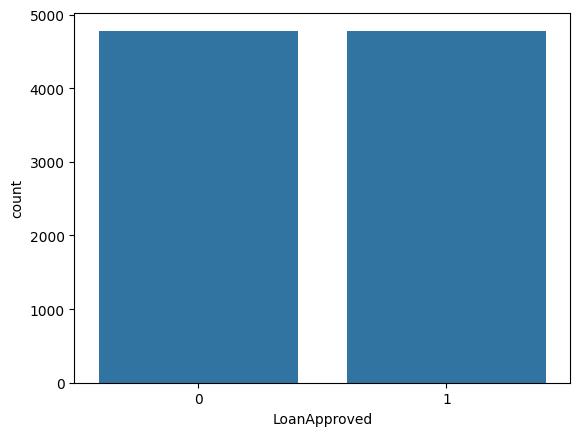

In [15]:
import seaborn as sns

print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

In [16]:
# Target column is 'LoanApproved'
# One-Hot Encoding for categorical columns
attr = pd.get_dummies(df[categorical_columns + numeric_columns], drop_first=True)
  # Features (all columns except the target)
target = df['LoanApproved']  # Target variable

# Split data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.25, random_state=44, shuffle=True
)

# Inspect the splits
print("Training Features Shape:", attr_train.shape)
print("Testing Features Shape:", attr_test.shape)
print("Training Target Shape:", target_train.shape)
print("Testing Target Shape:", target_test.shape)

# Optional: Display summaries
print("Training Data Summary:\n", attr_train.describe())
print("Testing Data Summary:\n", attr_test.describe())

Training Features Shape: (7170, 80)
Testing Features Shape: (2390, 80)
Training Target Shape: (7170,)
Testing Target Shape: (2390,)
Training Data Summary:
                Age   AnnualIncome  CreditScore   Experience     LoanAmount  \
count  7170.000000    7170.000000  7170.000000  7170.000000    7170.000000   
mean     40.793166   74307.196374   575.763459    18.533473   23018.451325   
std      11.488508   48772.890589    50.563711    11.232044   12541.144662   
min      18.000000   15000.000000   362.000000     0.000000    3674.000000   
25%      33.000000   38880.500000   544.000000    10.000000   14402.500000   
50%      41.000000   62569.500000   582.000000    18.000000   20232.000000   
75%      49.000000   95643.250000   612.000000    26.000000   28432.000000   
max      80.000000  485341.000000   712.000000    60.000000  158686.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count   7170.000000         7170.000000          7170.000000   
mean      52.

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB.fit(attr_train, target_train)
target_pred = GNB.predict(attr_test)
accuracy = accuracy_score(target_test,target_pred ) 
print(f'Accuracy of model {accuracy}%')
print('')

# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy of model 0.8251046025104602%

Model accuracy score with default hyperparameters: 0.8251

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1195
           1       0.90      0.74      0.81      1195

    accuracy                           0.83      2390
   macro avg       0.84      0.83      0.82      2390
weighted avg       0.84      0.83      0.82      2390


Confusion Matrix
[[1093  102]
 [ 316  879]]


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB = MultinomialNB()
MNB.fit(attr_train, target_train)
target_pred = MNB.predict(attr_test)
accuracy = accuracy_score(target_test,target_pred ) 
print(f'Accuracy of model {accuracy}%')
print('')

# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy of model 0.7732217573221757%

Model accuracy score with default hyperparameters: 0.7732

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1195
           1       0.76      0.81      0.78      1195

    accuracy                           0.77      2390
   macro avg       0.77      0.77      0.77      2390
weighted avg       0.77      0.77      0.77      2390


Confusion Matrix
[[886 309]
 [233 962]]
